In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

%matplotlib inline

# Constants

In [81]:
TESTING_PATH = Path("SpamData/03_Testing")
# Create the path if not ixist
TESTING_PATH.mkdir(parents=True, exist_ok=True)

TOKEN_ALL_PROB_FILE = str(TESTING_PATH / 'prob-all-tokens.txt')
TOKEN_SPAM_PROB_FILE = str(TESTING_PATH / 'prob-spam.txt')
TOKEN_HAM_PROB_FILE = str(TESTING_PATH / 'prob-ham.txt')

TEST_FEATURE_MATRIX = str(TESTING_PATH / 'test-features.txt')
TEST_TARGET_FILE = str(TESTING_PATH / 'test-target.txt')

VOCAB_SIZE = 2500

# Load the Data

In [82]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [83]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# <center>Joint Probability</center>
$$ P(A \cap B) = P(A) \times P(B)$$

# <center>Independence</center>
$$ P(Spam \; | \; Viagra) \times P(Spam \; | \; Free) $$


$$ P(Spam \; | \; Viagra) = \frac{([Occurrence \; in \; Spam] \; / \; [Nr. \; of \; Words \; in \; Spam]) \times 0.55} {[Occurrence \; Overall] \; / \; [Total \; Nr. \; of \; Words]} $$

# <center>Probability of Viagra occurring in an email, given that the email is spam</center>

$$ P(Spam \, | \, Viagra) = \frac {P(Viagra \, | \, Spam)} {P(Viagra)} \times P(Spam) $$

In [84]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a - ', a)
print('b - ', b)

a -  [1 2 3]
b -  [0 5 4]


In [85]:
a.dot(b)

22

In [86]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [87]:
a.dot(c)

array([21,  9])

In [88]:
a.dot(c).shape

(2,)

In [89]:
X_test.shape

(1724, 2500)

In [90]:
prob_token_spam.shape

(2500,)

In [91]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the Prior

$$ P(Spam \, | \, X) = \frac {P(X \, | \, Spam) \, P(Spam)} {P(X)} $$

<p><center>or in log format:</center></p>

$$ \log(P(Tokens \, | \, Spam) - \log(P(Tokens) + \log(P(Spam)$$

In [92]:
PROB_SPAM = 0.3116

Calculate the log probabilities of the tokens given that the email was spam

In [93]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint Probability in Log Format

In [94]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_token) + np.log(PROB_SPAM))

In [95]:
joint_log_spam[:5]

array([-184.43665086,  -43.31230876,  -50.53468933, -224.77661799,
       -176.54269824])

Calculate the log probability that the emails are non-spam given their tokens.

$$ P(Ham \, | \, X) = \frac {P(X \, | \, Ham) \, (1 - P(Ham))} {P(X)} $$

In [96]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_token) + np.log(1-PROB_SPAM))

In [97]:
joint_log_ham[:5]

array([-127.80919502,  -25.57345114,  -60.74605335, -136.80206457,
       -116.90928997])

In [98]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability
$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<p><center>**OR**</center></p>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [99]:
prediction = joint_log_spam > joint_log_ham

In [100]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [101]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify
$$ P(X \, | \, Spam) P(Spam) \neq \frac {P(X \, | \, Spam) \, P(Spam)} {P(X)} $$

In [102]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) + np.log(PROB_SPAM))
joint_log_ham = X_test.dot(np.log(prob_token_ham) + np.log(1-PROB_SPAM))

# Metrics and Evaluation

## Accuracy

In [103]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1329
Docs classified incorrectly 395


In [104]:
# Accuracy
correct_docs/len(X_test)

0.7708816705336426

In [106]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format( fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 22.91%
Accuracy of the model is 77.09%


## Visualizing the Results

In [165]:
# Chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(start=-14000, stop=1, num=2000)

C:\Users\OITAACMeineI\AppData\Local\Temp\1\ipykernel_13116\890548525.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


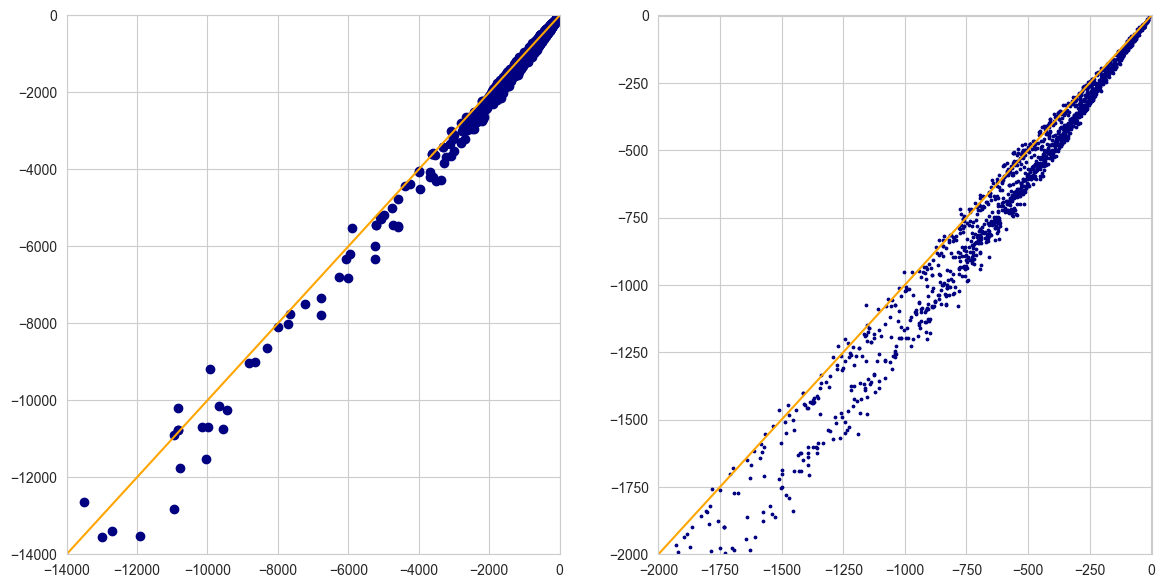

In [166]:
plt.figure(figsize=(14,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Chart Nr 1:
plt.subplot(1, 2, 1)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

# Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [167]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, 
                           xaxis_label:joint_log_ham,
                          labels: y_test})

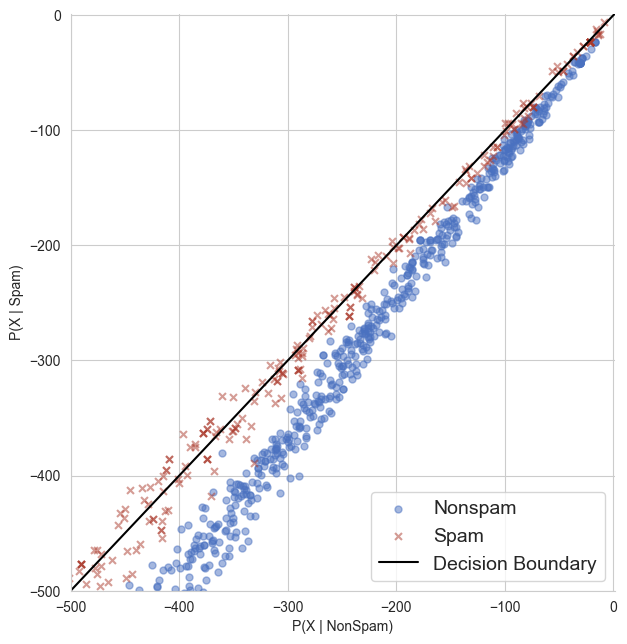

In [171]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, 
           y=yaxis_label, 
           data=summary_df, 
           height=6.5, 
           fit_reg=False,
           legend=False,
           scatter_kws={'alpha':0.5, 's':25},
           hue=labels,
           markers=['o','x'],
           palette=my_colors)

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color='black')
plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)
plt.show()

## False Positives and False Negatives

In [172]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1530,  194], dtype=int64))

In [173]:
true_pos = (y_test == 1) & (prediction == 1)

In [174]:
true_pos.sum()

194

In [179]:
false_pos = (y_test == 0) & (prediction == 1)

In [180]:
false_pos.sum()

0

In [181]:
false_neg = (y_test == 1) & (prediction == 0)

In [182]:
false_neg.sum()

395

In [183]:
true_neg = (y_test == 0) & (prediction == 0)

In [184]:
true_neg.sum()

1135

$$ Recall \, Score = \frac {True \, Positives} {True \, Positives \, + \, False \, Negatives} $$

$$ Precision \, Score= \frac {True \, Positives} {True \, Positives \, + \, False \, Positives} $$

In [186]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 32.94%


In [188]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.2%}'.format(precision_score))

Precision score is 100.00%


## F-Score or F1 Metric

$$ F-Score = 2 \times \frac {(Precision \, Score \times Recall \, Score)} {(Precision \, Score + Recall \, Score)} $$

In [193]:
f1_Score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_Score))

F Score is 0.5
